# Disission trees

In [ ]:
!pip install scikit-learn 
#Sklearn is the most used populare ML library in python


error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

In [25]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
#do everythin we did before:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# loading the dataset
df = pd.read_csv ("mpg.csv") #import iris data as dataframe
df.drop(["name"], axis = 1, inplace = True) #drop the name of the car as it is not needed

#use integer encoding to change the origen column to a number
df["origin"] = df["origin"].astype('category')
origin_mapping = dict(enumerate(df['origin'].cat.categories)) #save the map for later if needed
df['origin'] = df['origin'].cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int8   
dtypes: float64(3), int64(3), int8(1), object(1)
memory usage: 22.3+ KB


In [15]:
df['horsepower'].unique() #check the unique values of horsepower

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [26]:
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")
#drop all null values
df.dropna(inplace = True) 
X = df.drop(columns=['mpg'])
y = df['mpg']
model = DecisionTreeRegressor()
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int8   
dtypes: float64(3), int64(3), int8(1)
memory usage: 21.8 KB


In [27]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [28]:
model.fit(X,y)

DecisionTreeRegressor()

In [34]:
predictions = model.predict(X)
predictions

array([18. , 15. , 15. , 16. , 17. , 14. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 11. , 10. , 11. , 10. , 27. , 28. , 25. , 19. ,
       16. , 17. , 19. , 18. , 13. , 14. , 14. , 14. , 12. , 13. , 13. ,
       18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 31. , 27. ,
       26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 14. , 14. , 17. ,
       11. , 13. , 12. , 12. , 19. , 15. , 13. , 13. , 14. , 18. , 22. ,
       21. , 26. , 24. , 28. , 23. , 28. , 27. , 13. , 14. , 13. , 14. ,
       15. , 12. , 13. , 13. , 13. , 11. , 12. , 13. , 18. , 15. , 18. ,
       18. , 23. , 24. , 11. , 12. , 13. , 12. , 18. , 19. , 21. , 22. ,
       18. , 19. , 20. , 26. , 13. , 16. , 18. , 24. , 24. , 18. , 15. ,
       24. , 20. , 11. , 20. , 19. , 15. , 31. , 26. , 31. , 26. , 16. ,
       16. , 18. , 17.5, 13. , 14. , 14. , 14. , 29. , 26. , 26. , 31. ,
       32. , 28. , 28. , 26. , 24. , 24. , 26. , 19

Rememer you need 3 sets of data. Lets do that now.

In [38]:
from sklearn.metrics import r2_score


R² Score (Coefficient of Determination)

Measures: How well your model explains the variance in the target variable.

Range: Typically between 0 and 1 (can be negative for very bad models).

- R² = 1.0 → perfect prediction.

- R² = 0.0 → model predicts no better than the mean.

- R² < 0 → model performs worse than just guessing the average.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
score0_2 = r2_score(y_test, prediction)
print("R² score:", score0_2)

R² score: 0.8345046948507092


MAE (Mean Absolute Error)

Measures: The average of the absolute differences between predictions and actual values.

- Range: 0 to ∞
    - MAE = 0 → perfect predictions.

A high MAE means your model is often far off from the real values.

In [54]:
from sklearn.metrics import mean_absolute_error
mae0_2 = mean_absolute_error(y_test, prediction)
print("MAE:", mae0_2)

MAE: 2.339240506329114


(392, 8)

In [ ]:
print(df.shape)
X_test

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
19,4,97.0,46.0,1835,20.5,70,1
192,6,250.0,105.0,3353,14.5,76,0
397,4,119.0,82.0,2720,19.4,82,0
169,6,232.0,100.0,2914,16.0,75,0
359,4,141.0,80.0,3230,20.4,81,1
...,...,...,...,...,...,...,...
302,4,105.0,70.0,2150,14.9,79,0
84,4,97.0,88.0,2100,16.5,72,2
355,4,107.0,75.0,2210,14.4,81,2
346,4,97.0,67.0,2065,17.8,81,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
score = r2_score(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
print(X_test.shape)
print("R² score:", score)
print("MAE:", mae)
print("R² score:", score0_2)
print("MAE:", mae0_2)

(314, 7)
R² score: 0.760483264863731
MAE: 2.893312101910828
R² score: 0.8151553111050487
MAE: 2.339240506329114


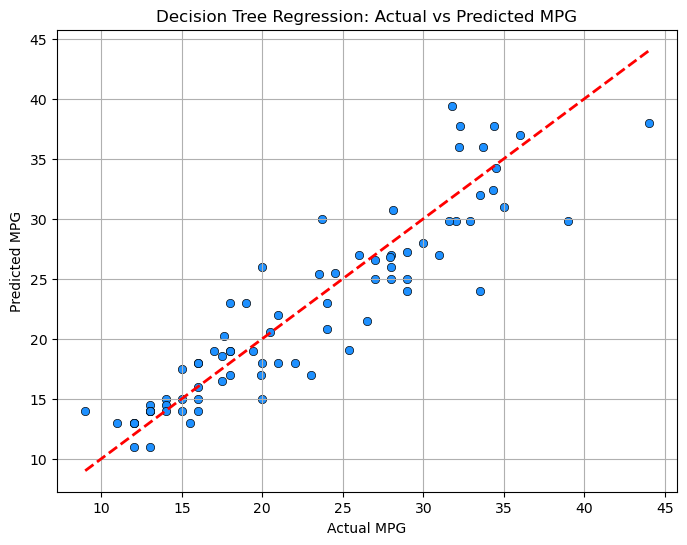

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
# Actual vs Predicted scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=prediction, color='dodgerblue', edgecolor='black')

# Line of perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Decision Tree Regression: Actual vs Predicted MPG")
plt.grid(True)
plt.show()

# Model persistance

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import joblib #this is a way to save the models 

df = pd.read_csv ("music.csv") #import iris data as dataframe

X = df.drop(columns=['genre'])
y = df['genre']
model = DecisionTreeClassifier()
model.fit(X,y)
joblib.dump(model, 'musik-recomender.joblib')




In [ ]:
model = joblib.load('musik-recomender.joblib')
predictions = model.predict([ [21,1]])
predictions

## Simple Linear Regression

Stay with me now: 

model the relationship between one feature (x) and one response variable (y) using the following equation:
y=β0+β1x+ε

- y: the outcome we are trying to predict (e.g., fuel efficiency, test score)
- x: the feature used to make predictions (e.g., horsepower, hours studied)
- β0​: the intercept (value of y when x=0)
- β1​: the slope coefficient (change in y for each unit increase in x)
- ε: the error term (captures the variation not explained by the model)

TLDR:
- y = MPG (target)
- x = horsepower (feature)
- β0​ = intercept
- β1​ = slope coefficient
- ε = error term



The objective of linear regression is to find values for β0​ and β1​ that minimize the total squared differences between the predicted values  of y and the actual observed values of y.


**Linear regression** is not just a predictive tool—it's also interpretive. It helps us:

- Understand relationships between variables

- Identify causal patterns (in experimental settings)

- Provide baseline models in complex systems


Note: to use linear regression the data needs to be able to be linear and independent and the data needs to be loosely correlated.  


In [ ]:
!pip install scikit-learn


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="darkgrid")


158495.79s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Defaulting to user installation because normal site-packages is not writeable


In [147]:
X = df[["horsepower"]]
y = df["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")


Intercept: 40.61
Coefficient: -0.16


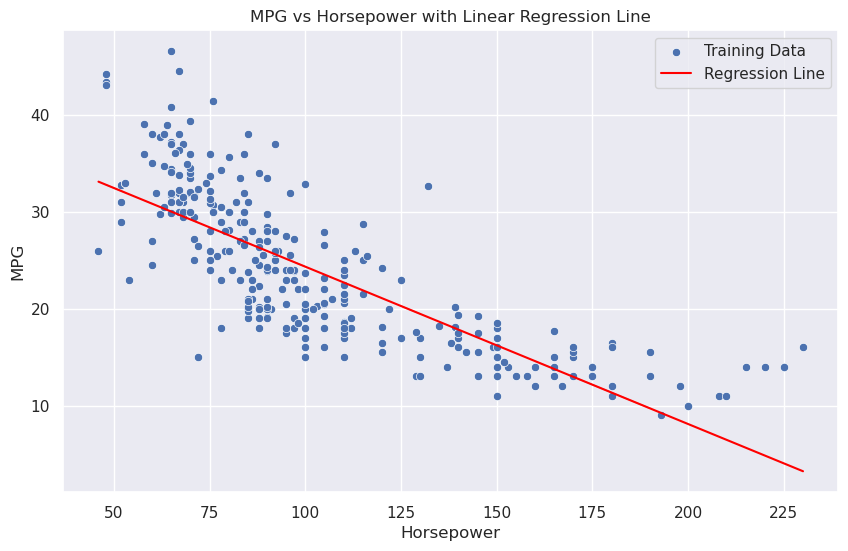

In [148]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train["horsepower"], y=y_train, label="Training Data")
sns.lineplot(x=X_train["horsepower"], y=model.predict(X_train), color="red", label="Regression Line")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("MPG vs Horsepower with Linear Regression Line")
plt.legend()
plt.show()
